<a href="https://colab.research.google.com/github/raklugrin01/DeepLearingBasics/blob/main/ChurnModellingFiles/ChurnModellingWithouKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ChurnModellingFiles/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()
#input and first hidden layer
model.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
#second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
#output layer
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [9]:
# Compiling the ANN
model.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
history = model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
#finding the best epoch value
print('Best epoch: %d' % (best_epoch,))

In [16]:
# Retrain the model for best epoch value
model_history =model.fit(X_train, y_train, epochs=best_epoch,batch_size = 10, validation_split=0.33)

Epoch 1/84
536/536 [==============================] - 2s 3ms/step - loss: 0.3258 - accuracy: 0.8634 - val_loss: 0.3602 - val_accuracy: 0.8546
Epoch 2/84
536/536 [==============================] - 2s 3ms/step - loss: 0.3257 - accuracy: 0.8640 - val_loss: 0.3608 - val_accuracy: 0.8542
Epoch 3/84
536/536 [==============================] - 2s 3ms/step - loss: 0.3259 - accuracy: 0.8636 - val_loss: 0.3597 - val_accuracy: 0.8538
Epoch 4/84
536/536 [==============================] - 2s 3ms/step - loss: 0.3256 - accuracy: 0.8647 - val_loss: 0.3605 - val_accuracy: 0.8538
Epoch 5/84
536/536 [==============================] - 2s 3ms/step - loss: 0.3256 - accuracy: 0.8636 - val_loss: 0.3595 - val_accuracy: 0.8550
Epoch 6/84
536/536 [==============================] - 2s 3ms/step - loss: 0.3256 - accuracy: 0.8660 - val_loss: 0.3594 - val_accuracy: 0.8542
Epoch 7/84
536/536 [==============================] - 2s 3ms/step - loss: 0.3256 - accuracy: 0.8632 - val_loss: 0.3592 - val_accuracy: 0.8557
Epoch 

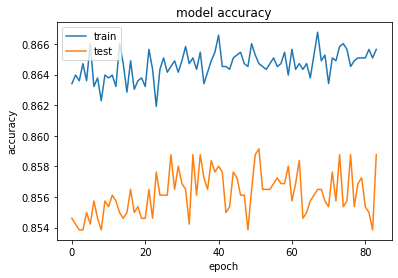

In [17]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

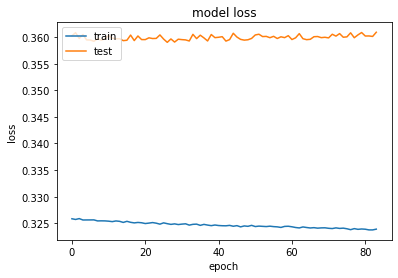

In [18]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [19]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [20]:
print(score)
print(cm)

0.8565
[[1499   96]
 [ 191  214]]
